## Введение в анализ данных, ИАД-2

## НИУ ВШЭ, 2019-20 учебный год

### Домашнее задание №2

Задание выполнил(а): _Новиков Владимир_

### Общая информация

__Дата выдачи:__ 04.03.2020

__Дедлайн:__ 23:59 17.03.2020

### Оценивание и штрафы

Оценка за ДЗ вычисляется по следующей формуле:

$$
\text{points} \times 10 / 16,
$$

где points — количество баллов за обязательную часть, которое вы набрали. Максимальное число баллов, которое можно получить за обязательную часть — 16, а максимальное число дополнительных баллов, которые пойдут в бонус — 2 (в бонус идет только целое число баллов). Бонусные задания отмечены звездочками (*).

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

Инвайт для группы ИАД-6: rd5CNrr

Перед отправкой перезагрузите ноутбук и проверьте, что все ячейки могут быть последовательно выполнены. Ноутбук должен запускаться с использованием python 3.6+

# kNN своими руками (5 баллов)

In [1]:
import numpy as np

### Реализуйте две функции расстояния (1 балл)
- Евклидова метрика
$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_2 = \sqrt{\sum\limits_{j=1}^n\left(x_{(i)}^j - x^j\right)^2}\qquad\text{(0.5 балла)}
$$
- метрика Манхэттена
$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_1 = \sum\limits_{j=1}^n\left|x_{(i)}^j - x^j\right|\qquad\text{(0.5 балла)}
$$
Обе функции должны на вход получать матрицу `np.array of shape(n, m)` и вектор `np.array of shape(m, )`, а возвращать вектор расстояний от каждой строчки матрицы до вектора `np.array of shape(n, )`

**В данном пункте запрещено использование циклов for, while. Пользуйтесь возможностями numpy.** 

In [2]:
def euclidian_metric(X, x):
    distances = np.linalg.norm(X - x, ord=2, axis=1.)
    print(distances)
    # your code here
    return distances

In [3]:
def manhattan_metric(X, x):
    distances = np.sum(np.abs(X - x), axis=1)
    print(distances)
    
    # your code here
    return distances

In [4]:
X = np.array([[1, 2, 3], [5, 6, 7], [8, 9, 10]])
y = np.ones(3)

In [5]:
assert np.allclose(euclidian_metric(X, y), np.array([ 2.23606798,  8.77496439, 13.92838828]))

[ 2.23606798  8.77496439 13.92838828]


In [6]:
assert np.allclose(manhattan_metric(X, y), np.array([ 3., 15., 24.]))

[ 3. 15. 24.]


### Реализуйте алгоритм kNN для регрессии (4 балла)

Реализуйте взвешенный алгоритм kNN для регрессии. Пусть нам нужно вычислить значение $y$ для некоторого $x$ при известных данных $\left(x_1, y_1\right), \ldots, \left(x_\ell, y_\ell\right)$. Предсказанием вашего регрессора будет являться

$$
\hat{y} = \frac{\sum\limits_{i=1}^kw_iy_{(i)}}{\sum\limits_{i=1}^kw_i},
$$
где $\left(x_{(1)}, y_{(1)}\right), \ldots, \left(x_{(k)}, y_{(k)}\right)$ - ближайшие $k$ объектов к $x$ по некоторой метрике $d(\cdot, \cdot)$. Ваш алгоритм должен уметь работать с двумя метриками:

$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_2 = \sqrt{\sum\limits_{j=1}^n\left(x_{(i)}^j - x^j\right)^2}\qquad\text{(евклидова)}
$$
$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_1 = \sum\limits_{j=1}^n\left|x_{(i)}^j - x^j\right|\qquad\text{(манхэттена)}
$$

- Реалиуйте данный класс для равномерных весов (то есть $w_i = \frac{1}{k}$) (__3 балла__)
- Реалиуйте возможность передать данному классу параметр `weights='distance'`, чтобы реализовывался взвешенный алгоритм kNN с весами, обратными расстояниям (то есть $w_i = \frac{1}{d\left(x, x_{(i)}\right)}$, где $d(x, y)$ - функция расстояния) (__1 балл__)

В данном классе должны быть реализованы методы `.fit` и `.predict`. Однако, для удобства может оказаться полезным реализовать еще некоторые вспомогательные методы, например, функции расстояния.

In [7]:
class KNN:
    def __init__(self, metric='euclid' or 'manhattan', k=5, weights='uniform' or 'distance'):
        """
        PARAMETERS:
        metric ('euclid' or 'manhattan')
        k - number of nearest neighbors
        """
        
        self.metric = metric
        self.k = k
        self.weights = weights
        
        self.X_train = None
        self.y_train = None
        
        
    def fit(self, X_train, y_train):
        """
        INPUT:
        X_train - np.array of shape (l, d)
        y_train - np.array of shape (l,)
        """
        # your code here
        self.X_train = X_train
        self.y_train = y_train
        
        
    def predict(self, X_test):
        """
        INPUT:
        X_test - np.array of shape (m, d)

        OUTPUT:
        y_pred - np.array of shape (m,)
        """
        return np.array([self._predict(x) for x in X_test])
    
        
    def _predict(self, X_test_i):
        distances = np.zeros(self.X_train.shape[0])
               
        for i, x_tr in enumerate(self.X_train):
            if self.metric == 'euclid':
                distances[i] = np.linalg.norm(X_test_i - x_tr, ord=2)
            else:
                distances[i] = np.linalg.norm(X_test_i - x_tr, ord=1)
                
        neighbor_id = np.argsort(distances)[:self.k]
        neighbors = [y_train[i] for i in neighbor_id]

        if self.weights == 'uniform' or None:
            return np.sum(neighbors)/ self.k
        else:
            d = [distances[i] for i in neighbor_id]
            return sum((1/d[i])*neighbors[i] for i in range(self.k)) / sum(1/d[i] for i in range(self.k))

#### Проверим, что наш knn и соответствующий knn из sklearn выдает одинаковые (ну, или почти одинаковые) результаты.

In [8]:
from sklearn.neighbors import KNeighborsRegressor

In [6]:
np.random.seed(17032019)
X_train = np.random.randn(1000, 50)
y_train = np.random.randn(1000,)
X_test = np.random.randn(500, 50)
y_test = np.random.randn(500,)

- Проверка для евклидовой метрики

In [10]:
knn = KNN(metric='euclid')
knn.fit(X_train, y_train)

sknn = KNeighborsRegressor(p=2, weights='uniform')
sknn.fit(X_train, y_train)

#print(knn.predict(X_test), sknn.predict(X_test))
#print(knn.predict(X_test))
assert np.allclose(knn.predict(X_test), sknn.predict(X_test))

- Проверка для манхэттенской метрики

In [11]:
knn = KNN(metric='manhattan')
knn.fit(X_train, y_train)

sknn = KNeighborsRegressor(p=1, weights='uniform')
sknn.fit(X_train, y_train)

#print(knn.predict(X_test), sknn.predict(X_test))
assert np.allclose(knn.predict(X_test), sknn.predict(X_test))

- Проверка для взвешенных весов

In [12]:
knn = KNN(metric='euclid', weights='distance')
knn.fit(X_train, y_train)

sknn = KNeighborsRegressor(p=2, weights='distance')
sknn.fit(X_train, y_train)

#print(knn.predict(X_test), sknn.predict(X_test))
assert np.allclose(knn.predict(X_test), sknn.predict(X_test))

In [13]:
knn = KNN(metric='manhattan', weights='distance')
knn.fit(X_train, y_train)

sknn = KNeighborsRegressor(p=1, weights='distance')
sknn.fit(X_train, y_train)

#print(knn.predict(X_test), sknn.predict(X_test))
assert np.allclose(knn.predict(X_test), sknn.predict(X_test))

# Линейная регрессия своими руками (5 баллов)

Реализуйте линейную регрессию с градиентным спуском для [функции потерь Хьюбера](https://en.wikipedia.org/wiki/Huber_loss):

$$
L_\delta\left(y, \hat{y}\right) =
\begin{cases}
\frac{1}{2}\left(y - \hat{y}\right)^2, \qquad &|y - \hat{y}| \leq \delta\\
\delta\left|y - \hat{y}\right| - \frac{1}{2}\delta^2,\qquad & \text{otherwise}
\end{cases}
$$

В таком случае общее значение функции потерь на всем датасете $(x_1, y_1), \ldots, (x_\ell, y_\ell)$ будет равно

$$
L = \frac{1}{\ell}\sum\limits_{i=1}^\ell L_\delta\left(y_i, \hat{y}_i\right)
$$

Чему будет равна производная данной функции по $\hat{y}$?

__Вспомните, что такое вектор $\hat{y}$? Как он зависит от $X$ и $w$?__

Проверьте работу вашего метода: выведите результаты его работы на той же искусственной выборке, что и в задаче выше (в качестве метрик качества используйте MSE и Huber loss). Постройте график зависимости значения функции потерь от итерации градиентного спуска.

*Вы можете опустить единичный признак в модели и не добавлять его в данные. Для данной искусственной выборки это не актуально, потому что целевая переменная в этом случае является случайной величиной из стандартного нормального распределения со средним 0.*

*Вектор весов в градиентном спуске можете инициализировать нулями.*

Эти ссылки могут показаться вам полезными:
- https://github.com/esokolov/ml-course-hse/blob/master/2019-fall/lecture-notes/lecture02-linregr.pdf
- https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931
- https://stats.stackexchange.com/questions/312737/mean-absolute-error-mae-derivative

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

### Реализуйте функцию потерь Хьюбера для одного примера и ее градиент по весам (1 балл)

In [3]:
def huber_loss(x, y, w, delta):
    """
    x - np.array shape=(d,)
    y - scalar
    w - np.array shape=(d,)
    delta - scalar
    
    OUTPUT:
    loss - scalar
    """
    residual = y - np.dot(w, x)
    if np.abs(residual) <= delta:
        return 0.5*residual**2
    else:
        return delta*(np.abs(residual) - 0.5*delta)
      
    pass

def huber_grad(x, y, w, delta):
    """
    INPUT:
    x - np.array shape=(d,)
    y - scalar
    w - np.array shape=(d,)
    delta - scalar
    
    OUTPUT:
    grad - np.array shape=(d,)
    """
    residual = y - np.dot(w, x)
    if np.abs(residual) <= delta:
        return -residual*x
    else:
        return -delta*np.sign(residual)*x
       
    pass

Небольшие проверки для вашего удобства

In [4]:
x = np.array([1, 2, 3])
w = np.array([3, 5, 12])
y = 19
delta = 1

print(huber_loss(x, y, w, delta))
assert huber_loss(x, y, w, delta) == 29.5
print(huber_grad(x, y, w, delta))
assert np.allclose(huber_grad(x, y, w, delta), np.array([1, 2, 3]))

29.5
[1 2 3]


In [5]:
x = np.array([1, 2, 3])
w = np.array([3, 5, 12])
y = 49.2
delta = 1

print(huber_loss(x, y, w, delta))
assert np.allclose(huber_loss(x, y, w, delta), 0.02000000000000057)
print(huber_grad(x, y, w, delta))
assert np.allclose(huber_grad(x, y, w, delta), np.array([-0.2, -0.4, -0.6]))

0.02000000000000057
[-0.2 -0.4 -0.6]


Так будет выглядеть график нашей функции потерь. Можете (это не обязательное требование) проверить, что ваш результат будет выглядеть так же.

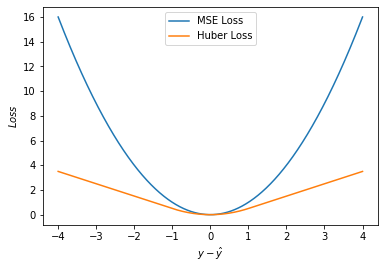

In [162]:
grid = np.linspace(-4, 4, 1000)

mse_loss = grid ** 2
mae_loss = np.abs(grid)
huber_loss = 0.5 * mse_loss * (grid >= -1) * (grid <= 1) + (mae_loss - 0.5) * (grid < -1) + (mae_loss - 0.5)  * (grid > 1)

plt.plot(grid, mse_loss, label="MSE Loss")
plt.plot(grid, huber_loss, label="Huber Loss")

plt.xlabel("$y - \hat y$")
plt.ylabel("$Loss$")
plt.legend()

##оно не совсем такое, каким должно быть

### А теперь уже и саму линейную регрессию (4 балла)

In [7]:
class LinearRegressionHuber:
    def __init__(self, delta=1.0, max_iter=1000, tol=1e-6, eta=1e-2):
        """
        PARAMETERS:
        delta - scalar in Huber loss
        max_iter - maximum possible number of iterations in Gradient Descent
        tol - precision for stopping criterion in Gradient Descent
        eta - step size in Gradient Descent (learning rate)
        """
        
        self.delta = delta
        self.max_iter = max_iter
        self.tol = tol
        self.eta = eta
        
        self.w = None
        self.loss_history = None
        
    def fit(self, X, y):
        """
        INPUT:
        X_train - np.array of shape (l, d)
        y_train - np.array of shape (l,)
        
        В этой функции вы должны инициализировать веса нулями, а также 
        итерационно обновлять веса с помощью 
        градиентного спуска (считать и запоминать лосс на каждой итерации тоже будет неплохо)
        """
        self.w = np.zeros(X.shape[1])
        self.loss_history = []
        
        loss = self.calc_loss(X, y)
        
        self.loss_history.append(loss)
        
        for i in range(self.max_iter):
            self.w -= self.eta*self.calc_gradient(X, y)
            self.loss_history.append(self.calc_loss(X, y))
            
            if self.loss_history[-1] <= self.tol:
                break
        return self.loss_history
        
    def predict(self, X_test):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        
        Просто предсказать ответы с помощью обученных весов
        """
        
        y_pred = np.dot(X_test, self.w)

        return y_pred
    
    def calc_gradient(self, X, y):
        """
        Calculates the gradient of Huber loss by weights.
        
        INPUT:
        X - np.array of shape (l, d)
        y - np.array of shape (l,)
        
        OUTPUT:
        grad - np.array of shape (d,)
        
        Посчитайте градиент как среднее от градиентов для каждого примера
        """
        grad = np.zeros_like(self.w)
        
        grads = np.mean(list(map(lambda pair: huber_grad(pair[0], pair[1], self.w, self.delta), zip(X, y))), axis=0)
                
        return grads 
    
    def calc_loss(self, X, y):
        """
        Calculates the Huber loss.
        
        INPUT:
        X - np.array of shape (l, d)
        y - np.array of shape (l,)
        
        OUTPUT:
        loss - float
        
        Посчитайте loss по выборке как сумма loss'ов для каждого 
        примера, поделить на размер выборки
        """
        
        loss = 0
        
        loss = np.mean(list(map(lambda pair: huber_loss(pair[0], pair[1], self.w, self.delta), zip(X, y))))
        #print(loss)
        loss /= len(X)
        
        return loss


In [8]:
lr = LinearRegressionHuber()

In [9]:
loss_history = lr.fit(X_train, y_train)

Постройте график зависимости функции потерь от итерации

Text(0.5, 1.0, 'Huber loss dependence on GD iteration')

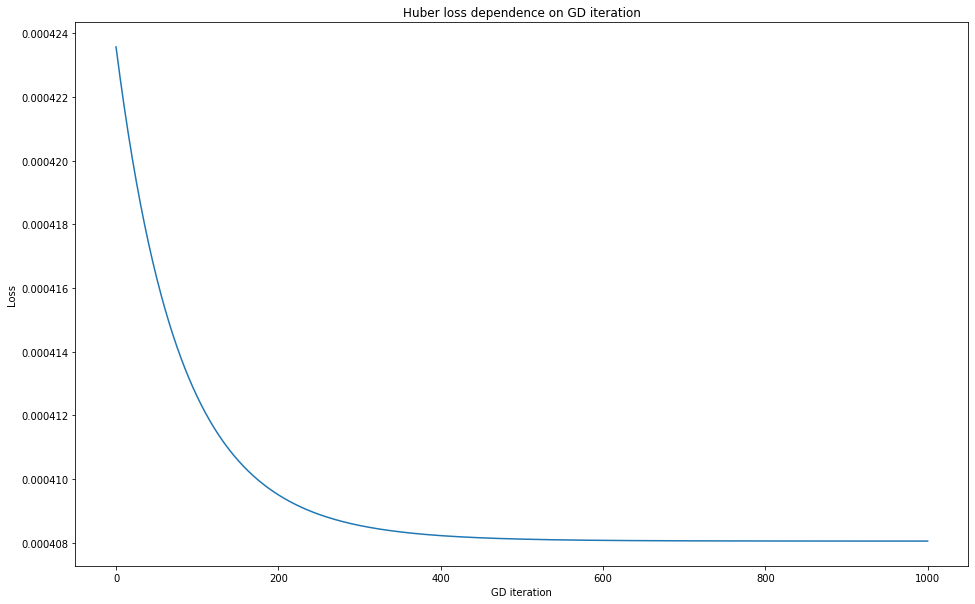

In [107]:
# your code here
fig, ax = plt.subplots(figsize=(16,10))
X = np.arange(len(loss_history))
ax.plot(X, loss_history)
ax.set_xlabel("GD iteration")
ax.set_ylabel("Loss");
ax.set_title("Huber loss dependence on GD iteration")

# Практика (7 баллов)

Пожалуйста, при использовании различных функций из библиотек импортируйте все, что вам понадобилось в данной части, в следующем блоке:

In [109]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as skl

from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, f_regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures, OneHotEncoder, LabelEncoder
from sklearn import preprocessing


%matplotlib inline

В этом домашнем задании вы поработаете с данными из другого соревнования на Kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques. Задача - предсказание цены дома.

In [110]:
df = pd.read_csv('train.csv', header=0)

In [111]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [112]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [113]:
df.drop('Id', axis=1, inplace=True)

In [114]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Посмотрим на тип данных:

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

## 1 (1 балл)

Есть ли в данных пропуски? Если да, то для каждого столбца, в котором они имеются, посчитайте их количество и их долю от общего числа значений. Что вы наблюдаете? Избавьтесь от пропусков. Для каждого из примененных методов обоснуйте свое решение. **Проверьте, что вы действительно избавились от пропусков.**

*Напоминание. В зависимости от типа столбца, можно заполнить пропуски, например, средним арифметическим, медианой, модой, можно какими-то отдельными значениями. А можно такие столбцы вообще удалить.*

In [116]:
# your code here
na_col = df.columns[df.isna().any()]
df[na_col].isna().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Посчитаем долю пропущенных значений:

In [117]:
df[na_col].isna().mean()

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

Теперь заменим пропущенные значения (для вещественных признаков -- их средним, для категориальных -- пустой строкой):

In [118]:
df_mask = (df.dtypes == "object").values ## маска для категориальных признаков

In [119]:
df_real = df[df.columns[~df_mask]]
mis_replacer = preprocessing.Imputer(strategy="mean")
df_no_mis_real = pd.DataFrame(data=mis_replacer.fit_transform(df_real), columns=df_real.columns)
# для категориальных - пустыми строками
df_cat = df[df.columns[df_mask]].fillna("")
df = pd.concat([df_no_mis_real, df_cat], axis=1)
df.head()

C:\Users\Vladimir\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,Attchd,RFn,TA,TA,Y,,,,WD,Normal
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,Attchd,RFn,TA,TA,Y,,,,WD,Normal
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,Attchd,RFn,TA,TA,Y,,,,WD,Normal
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,Detchd,Unf,TA,TA,Y,,,,WD,Abnorml
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,Attchd,RFn,TA,TA,Y,,,,WD,Normal


Теперь еще раз проверим пропущенные значения:

In [120]:
na_col = df.columns[df.isna().any()]
df[na_col].isna().sum()

Series([], dtype: float64)

## 2 (0.5 балла)

Обработайте категориальные признаки. В их обнаружении вам может помочь синтаксис `pandas` (например, можно обратить внимание на типы столбцов), а также описание датасета и его исследование.

In [121]:
df.shape

(1460, 80)

In [122]:
df_old = df
df = pd.get_dummies(df, drop_first = False)
print(df.shape)

(1460, 305)


In [123]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0


Кстати, как следует из документации, на самом деле `MSSubClass` - категориальная переменная, закодированная через label encoding, перекодируем и ее тоже

In [124]:
df = pd.get_dummies(df, columns = ["MSSubClass"], drop_first = False)
df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,MSSubClass_60.0,MSSubClass_70.0,MSSubClass_75.0,MSSubClass_80.0,MSSubClass_85.0,MSSubClass_90.0,MSSubClass_120.0,MSSubClass_160.0,MSSubClass_180.0,MSSubClass_190.0
0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,...,1,0,0,0,0,0,0,0,0,0
1,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,...,0,0,0,0,0,0,0,0,0,0
2,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,...,1,0,0,0,0,0,0,0,0,0
3,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,...,0,1,0,0,0,0,0,0,0,0
4,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,...,1,0,0,0,0,0,0,0,0,0


In [125]:
print(df.shape)

(1460, 319)


## 3 (0.5 балла)

Вычислите и визуализируйте попарную корреляцию Пирсона между всеми признаками. Какие выводы можно сделать?

*Для визуализации можно использовать `seaborn.heatmap()`.*

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

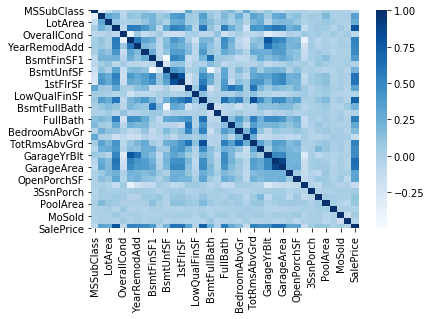

In [127]:
# your code here
cortest = df_old.corr()
sns.heatmap(cortest, vmax = 1, cmap = 'Blues')

Я использую копию исходного датасета без перекодированных дамми переменных, иначе в связи с облием слабо скоррелированных признаков было бы сложно что-либо разобрать (это можно наблюдать на графике ниже); исходя из графика выше можно сделать вывод, что признаки в целом достаточно слабо попарно скоррелирвоаны между собой, хотя среди неперекодированных в дамми категориальных признаков иногда есть достаточно сильная корреляция - это означает, что часть из них дублирует информацию и нет смысле одновременно включать их в модель.

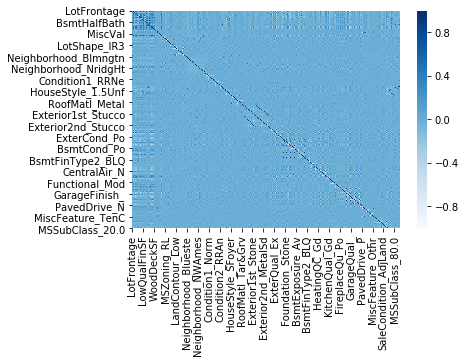

In [155]:
cortest_test = df.corr()
sns.heatmap(cortest_test, vmax = 1, cmap = 'Blues')

## 5 (0.5 балла)

Найдите признаки с максимальным и минимальным **абсолютным** значением коэффициента корреляции Пирсона с предсказываемым значением. Изобразите на графиках зависимость найденных признаков от предсказываемого значения.

*Не забудьте указать название графика и обозначить, что изображено по каждой из осей.*

In [129]:
(np.abs(df_old.corr()["SalePrice"])).sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475241
GarageYrBlt      0.470177
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePrice, dtype: float64

Признак с наименьшей корреляцией - `BsmtFinSF2`  (Type 2 finished square feet), с наибольшей - `OverallQual` (Rates the overall material and finish of the house)

Note: я снова использую для построения корреляций датасет без дамми-переменных, потому что корреляция с отдельным признаком будет достаточено малоинформативной, а график будет представлять собой скорее boxplot.

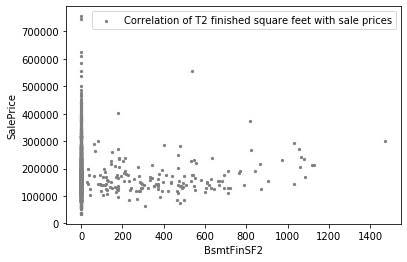

In [130]:
df_old.plot.scatter(x = "BsmtFinSF2", y = "SalePrice", s = 5, c = "gray", label = 'Correlation of T2 finished square feet with sale prices')

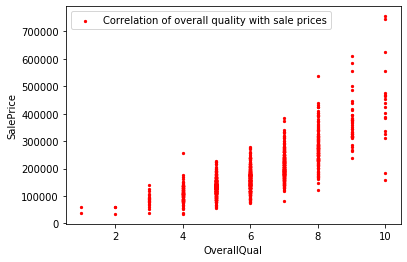

In [131]:
df_old.plot.scatter(x = "OverallQual", y = "SalePrice", s = 5, c = "red", label = 'Correlation of overall quality with sale prices')

Так как `OverallQual` представляет собой квази-факторную перемнную с только целочисленными значениями график выглядит довольно странно.

## 6 (0.5 балла)

Постройте гистограмму распределения предсказываемого значения. Для избавления от разницы в масштабах, а также «смещения» распределения переменной в сторону нормального (что бывает полезно при статистическом анализе), можно прологарифмировать ее (это обратимое преобразование, поэтому целевую переменную легко восстановить). В данном случае воспользуйтесь `numpy.log1p`, чтобы сделать преобразование $y \to \ln\left(1 + y\right)$. Постройте гистограмму распределения от нового предсказываемого значения. Опишите наблюдения.

*В дальнейшем используйте в качестве предсказываемого значения вектор, который получился после логарифмирования.*

Text(0.5, 1.0, 'Bare SalePrice distribution')

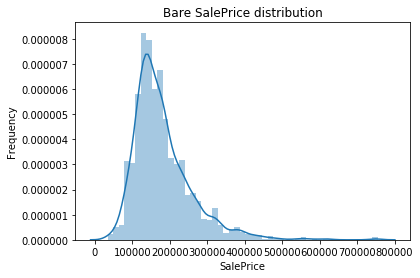

In [132]:
sns.distplot(df["SalePrice"])
plt.ylabel('Frequency')
plt.title('Bare SalePrice distribution')

Мы видим, что логарифм отклика (график ниже) имеет более приближенное к нормальному распределение, в сравнение с нелогарифмированным (на графике выше), а значения распределены на меньшем спектре и центрированы вокруг примерно 12, что ближе к 0.

Text(0.5, 1.0, 'Log SalePrice distribution')

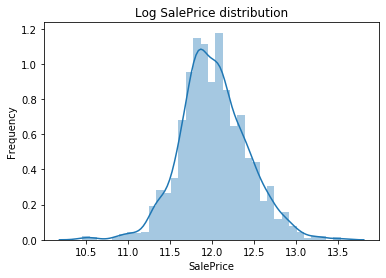

In [133]:
# your code here
sns.distplot(np.log1p(df["SalePrice"]))
plt.ylabel('Frequency')
plt.title('Log SalePrice distribution')

Перейдем непосредственно к построению моделей. Разобьем выборку на обучение и контроль.

*Пожалуйста, **не меняйте** значение `random_state` в следующей ячейке.*

In [159]:
X_train, X_val, y_train, y_val = train_test_split(df.drop('SalePrice', axis=1),
                                                  np.log1p(df['SalePrice']), random_state=17032019)

In [160]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1095, 318), (365, 318), (1095,), (365,))

## 7 (2 балла)

Примените к данным следующие алгоритмы:

- kNN
- линейная регрессия
- Lasso
- Ridge

(Если вдруг забыли что такое Lasso и Ridge - https://habr.com/ru/post/328760/)

Для каждого из методов подберите гиперпараметры с помощью кросс-валидации. Обучите алгоритмы с лучшими гиперпараметрами на обучающей выборке и оцените качество по метрике **Root** Mean Squared Error. Какой из методов показывает себя лучше?

In [136]:
grid_search_ = GridSearchCV(
    KNeighborsRegressor(),
    param_grid={'n_neighbors': range(1, 40, 1), 'weights': ['uniform', 'distance'], 'p': [1, 2, 3]},
    cv = 5)

grid_search_.fit(X_train, y_train)
pred_gs = grid_search_.predict(X_val)
RMSE_gs = (mean_squared_error(y_val, pred_gs))**0.5
print(RMSE_gs, grid_search_.best_params_)

0.19541161109218994 {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


In [137]:
grid_search_linreg = GridSearchCV(
    LinearRegression(),
    param_grid={'fit_intercept': ['True', 'False']},
    cv = 5)

grid_search_linreg.fit(X_train, y_train)
pred_linreg = grid_search_linreg.predict(X_val)
RMSE_linreg = (mean_squared_error(y_val, pred_linreg))**0.5
lrcoef = grid_search_linreg.best_estimator_.coef_
print(RMSE_linreg, grid_search_linreg.best_params_)


lrcoef = grid_search_linreg.best_estimator_.coef_

0.13538522824266008 {'fit_intercept': 'True'}


In [138]:
parametrs = {'alpha': np.linspace(0.0001, 20, 1000), 'fit_intercept': ['True', 'False']}

In [147]:
grid_searchR = GridSearchCV(
    Ridge(),
    param_grid=parametrs,
    cv = 5)

grid_searchR.fit(X_train, y_train)
pred_R = grid_searchR.predict(X_val)
RMSE_R = (mean_squared_error(y_val, pred_R))**0.5
rcoef = grid_searchR.best_estimator_.coef_
print(RMSE_R, grid_searchR.best_params_)

0.12905825119273853 {'alpha': 8.168227327327326, 'fit_intercept': 'True'}


In [161]:
grid_searchL = GridSearchCV(
    Lasso(max_iter = 2500),
    param_grid=parametrs,
    cv=5)


grid_searchL.fit(X_train, y_train)
predL = grid_searchL.predict(X_val)
RMSE_LASSO = (mean_squared_error(y_val, predL))**0.5
lcoef = grid_searchL.best_estimator_.coef_
print(RMSE_LASSO, grid_searchL.best_params_)

0.12421152996988664 {'alpha': 0.0001, 'fit_intercept': 'True'}


Наилучшим образом себя показывают Ridge и Lasso модели; наихудший результат показывет kNN

## 8 (0.5 балла)

Постройте гистограммы значений весов для линейной регрессии, Lasso и Ridge. Опишите наблюдения. В чем различия между полученными наборами весов и почему?

Text(0.5, 1.0, 'Linear regression coefficients distribution')

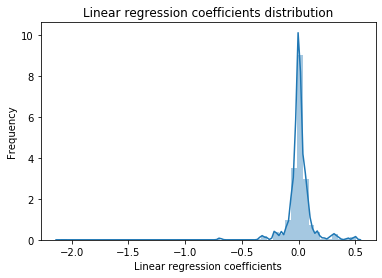

In [151]:
sns.distplot(lrcoef)
plt.ylabel('Frequency')
plt.xlabel('Linear regression coefficients')
plt.title('Linear regression coefficients distribution')

Text(0.5, 1.0, 'Lasso regression coefficients distribution')

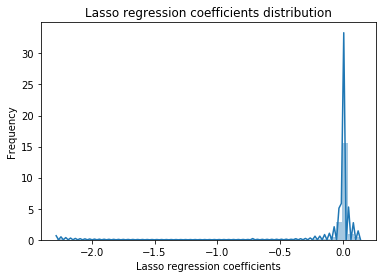

In [149]:
sns.distplot(lcoef)
plt.ylabel('Frequency')
plt.xlabel('Lasso regression coefficients')
plt.title('Lasso regression coefficients distribution')

Text(0.5, 1.0, 'Ridge regression coefficients distribution')

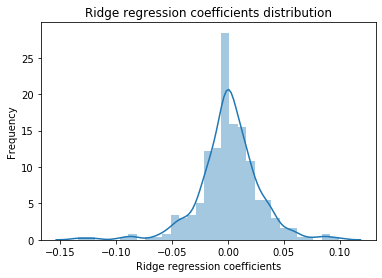

In [150]:
sns.distplot(rcoef)
plt.ylabel('Frequency')
plt.xlabel('Ridge regression coefficients')
plt.title('Ridge regression coefficients distribution')

_Мы видим, что Лассо и Ридж модели дают более центрированное распределение весов, по сравнению с обычной линейной регрессией: вариация оценок коэффициентов ниже (разброс в пределах (-1, 1) для Лассо и (-0.2, 0.2) для Ридж, в сравнении с (-1, 2.5) для обычной линейной модели), при этом распределение более симметричное и сосредаточенное вокруг 0._


Наилучшим образом себя показывает Ридж модель - она имеет наиболее симметричное распределение коэффициентов и при этом наименьшую общую вариацию; чуть хуже себя показывает Лассо модель, хотя она также центрирована около нуля и именно там сконцентрировано ее распределение, у нее больше вариация оценок коэффициентов; обычная линейная регрессия дает максимальную вариацию оценок коэффициентов и менее центрированное распределение.

## 9 (0.5 балла)

Добейтесь того, чтобы в заданиях выше ваш лучший алгоритм давал качество не больше 0.125 на тестовых данных по метрике RMSE (если вы дошли до этого задания, а качество выше уже удовлетворяет этому условию, вы автоматически получите за него полный балл).

In [144]:
# your code here

## 10* (1 балл)

Добейтесь того, чтобы в заданиях выше ваш лучший алгоритм давал качество не больше 0.121 на тестовых данных по метрике RMSE. Для этого вы можете использовать самые разные методы, какие захотите - отбор признаков, генерация новых, разные способы предобработки данных. Единственное ограничение - не использовать никакие алгоритмы регрессии, кроме kNN, линейной регрессии, Lasso и Ridge.

In [145]:
# your code here

# Теория (бонусная часть)

За данную часть можно получить бонусные баллы. Решения необходимо оформить в этом же файле в ячейках типа Markdown, пользуясь $\LaTeX$ для записи математических формул.

## 1* (0.5)

Вычислите производную сигмоидной функции

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

и выразите ее через $\sigma(x)$.

$\sigma(x) = \frac{1}{1+e^{-x}};$ <br>


$\frac{d\sigma(x)}{dx} = \frac{d}{dx}[\frac{1}{1+e^{-x}}] =$


$ = -(1+e^{-x})^{-2}(-e^{-x}) =$


$= \frac{e^{-x}}{(1+e^{-x})^2} =$


$= \frac{(1+e^{-x}) - 1}{(1+e^{-x})^2} =$


$= \frac{1}{1+e^{-x}} \cdot (1 - \frac{1}{1+e^{-x}}) =$


$= \sigma(x) \cdot (1 - \sigma(x)$ 

## 2* (0.5)

Найдите константу $C$, решающую следующую задачу ($0 < \tau < 1$ фиксировано):

$$
\sum\limits_{i=1}^\ell\rho_\tau\left(y_i - C\right) \to \min_C,
$$

где

$$
\rho_\tau(z) =
\begin{cases}
\tau z, & z > 0\\
(\tau - 1)z, & z \leq 0
\end{cases}
$$

Вам может показаться полезной эта ссылка https://medium.com/@gennadylaptev/median-and-mae-3e85f92df2d7

$\phi = \sum \rho_{\tau}(y_i - C) -> min_C$ 

$
\rho_\tau(z) =
\begin{cases}
\tau z, & z > 0\\
(\tau - 1)z, & z \leq 0
\end{cases}
$ -- $\rho_{\tau} > 0 \forall \tau$, так как $\tau \in (0,1)$

$\dfrac{d \phi(x)}{dx} = 0$ - условие минимума

$
\phi = 
\begin{cases}
\sum \rho_{\tau}|y_i - C |, & C \leq y_i\\
\sum \rho_{\tau}|y_i - C |(-1), & C > y_i
\end{cases}
$

Для $C \leq y_i$ минимум достигается при $C = median(y_i)$, для $C > y_i$ функция убывает с возрастанием С.






